# Análise Exploratória de Dados com Python
## Análise Bivariada - Exercício
O objetivo deste notebook é exercitar as principais funções em Python para conduzir uma análise bivariada de dados, aplicando os conceitos de:
- Correlação linear de Pearson  
- Information Value

Além destes, construir gráficos que evidenciem as relações entre duas variáveis.  

### Enunciado



Uma empresa solicitou a uma consultoria um diagnóstico de seu Serviço de Suporte a Clientes. Com base no diagnóstico a partir da análise de dados, a empresa pretende entender quais são as oportunidades de melhorias dos produtos e serviços ofertados.   

Considerando a base **dados_suporte_tecnico.xlsx**, extraia dos dados informações para auxiliar o diagnóstico.  

Como roteiro de uma análise bivariada, responda às perguntas:  

a) Há correlação entre o Tempo Médio de Atendimento (TMA) e a nota recebida pelo atendimento?  Visualize o resultado em um gráfico.  

b) Há alguma diferença na nota se houve a conversão do atendimento ou não? Visualize.  

c) Há alguma diferença na nota se houve a resolução na primeira chamada ou não? Visualize.  

d) O atendente é uma variável importante para o ticket ser resolvido na primeira chamada? Dica: use o conceito de Information Value.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.__version__

'2.1.4'

In [3]:
np.__version__

'1.26.4'

### Carregando os dados

In [4]:
# Lendo excel
df = pd.read_excel('..\Dados\Exercicio_suporte_tecnico.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025 entries, 0 to 3024
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ticket_id                      3025 non-null   int64         
 1   inicio_atendimento             3025 non-null   datetime64[ns]
 2   fim_atendimento                3025 non-null   datetime64[ns]
 3   turno                          3025 non-null   object        
 4   atendente_nome                 3025 non-null   object        
 5   resolvido_na_primeira_chamada  3025 non-null   object        
 6   conversao_atendimento          3025 non-null   object        
 7   nota_csat                      3006 non-null   float64       
 8   produto                        3025 non-null   object        
 9   cliente                        3025 non-null   object        
 10  ticket_reaberto                3025 non-null   object        
 11  ticket_original  

In [5]:
df.head()

,ticket_id,inicio_atendimento,fim_atendimento,turno,atendente_nome,resolvido_na_primeira_chamada,conversao_atendimento,nota_csat,produto,cliente,ticket_reaberto,ticket_original
0,1048,2023-12-01 06:00:00,2023-12-01 06:15:00,Manhã,Carla Souza,Sim,Sim,7.0,Serviço C,Empresa X,Não,NaN
1,436,2023-12-01 06:12:00,2023-12-01 06:18:00,Manhã,Ana Paula,Sim,Sim,4.0,Serviço C,Empresa Z,Não,NaN
2,1725,2023-12-01 06:18:00,2023-12-01 06:52:00,Manhã,Maria Fernandes,Não,Não,3.0,Produto B,Empresa Y,Sim,NaN
3,1186,2023-12-01 06:19:00,2023-12-01 06:56:00,Manhã,Carla Souza,Sim,Sim,4.0,Serviço C,Empresa X,Não,NaN
4,2683,2023-12-01 06:27:00,2023-12-01 06:50:00,Manhã,Ricardo Andrade,Não,Não,2.0,Produto A,Empresa Z,Não,NaN


In [6]:
df.describe(include='all')

,ticket_id,inicio_atendimento,fim_atendimento,turno,atendente_nome,resolvido_na_primeira_chamada,conversao_atendimento,nota_csat,produto,cliente,ticket_reaberto,ticket_original
count,3025.000000,3025,3025,3025,3025,3025,3025,3006.000000,3025,3025,3025,939.000000
unique,NaN,NaN,NaN,3,6,2,2,NaN,4,3,2,NaN
top,NaN,NaN,NaN,Noite,Lucas Martins,Sim,Não,NaN,Serviço D,Empresa Y,Não,NaN
freq,NaN,NaN,NaN,1289,524,2148,1549,NaN,800,1048,2082,NaN
mean,1500.215537,2023-12-04 18:16:01.408264704,2023-12-04 18:49:19.477685760,NaN,NaN,NaN,NaN,5.485695,NaN,NaN,NaN,1471.550586
min,0.000000,2023-12-01 06:00:00,2023-12-01 06:15:00,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000
25%,749.000000,2023-12-02 23:10:00,2023-12-02 23:57:00,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,703.500000
50%,1500.000000,2023-12-04 19:22:00,2023-12-04 19:33:00,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,1453.000000
75%,2252.000000,2023-12-06 13:18:00,2023-12-06 13:32:00,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,2212.500000
max,2999.000000,2023-12-08 05:59:00,2023-12-08 06:59:00,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,2997.000000


### Análise Bivariada

O primeiro indicador a ser analisado é o **Tempo Médio de Atendimento (TMA)**, uma medida calculada para computar a duração entre o momento do início e o final do contato do atendimento.  

In [7]:
# Criando uma coluna para o cálculo do TMA em minutos
df['TMA'] = (df['fim_atendimento']-df['inicio_atendimento']).dt.total_seconds()/60

In [8]:
# Estatística descritiva básica - Medidas resumo
df['TMA'].describe()

count    3025.000000
mean       33.301157
std        17.258008
min         2.000000
25%        18.000000
50%        36.000000
75%        48.000000
max        60.000000
Name: TMA, dtype: float64

#### a) Correlação entre TMA e nota do atendimento

In [9]:
df['TMA'].corr(df['nota_csat'], method='pearson')

0.006503607346734093

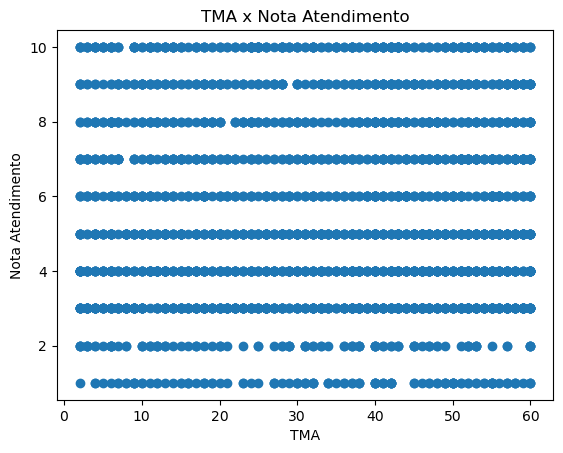

In [10]:
# Visualizando a relação entre as duas variáveis em um gráfico
# Criar o gráfico de dispersão
plt.scatter(df['TMA'], df['nota_csat'])

# Personalizar o gráfico
plt.title('TMA x Nota Atendimento')
plt.xlabel('TMA')
plt.ylabel('Nota Atendimento')

# Mostrar o gráfico
plt.show()

_Resposta a)_:  
O tempo médio de atendimento (TMA) e a nota de atendimento (nota_csat) apresenta valor para correlação linear de Pearson de 0,0065, ou seja, muito próxima de zero, indicando não haver relação entre o tempo de atendimento e a avaliação dada ele.  
O gráfico de dispersão evidencia essa ausência de relação.

#### b) Nota do Atendimento se há ou não conversão
Há alguma diferença na nota se houve a conversão do atendimento ou não? Visualize.


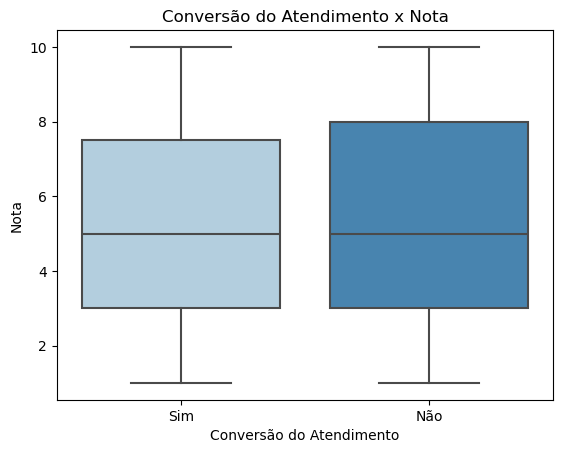

In [11]:
# Criar o boxplot com seaborn
sns.boxplot(x=df['conversao_atendimento'],y=df['nota_csat'],palette='Blues')
           
# Personalizar o gráfico
plt.title('Conversão do Atendimento x Nota')
plt.xlabel('Conversão do Atendimento')
plt.ylabel('Nota')

# Mostrar o gráfico
plt.show()

_Resposta b)_:  
Com base no observado no gráfico acima, não há indicação de haver diferença de notas se houve a conversão do atendimento.  

#### c) Nota do Atendimento se foi resolvido no primeiro contato
Há alguma diferença na nota se houve o ticket foi resolvido no primeiro contato ou não? Visualize.


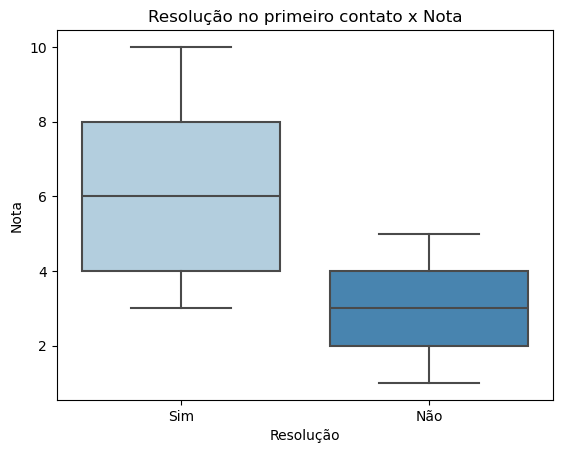

In [12]:
# Criar o boxplot com seaborn
sns.boxplot(x=df['resolvido_na_primeira_chamada'],y=df['nota_csat'],palette='Blues')
           
# Personalizar o gráfico
plt.title('Resolução no primeiro contato x Nota')
plt.xlabel('Resolução')
plt.ylabel('Nota')

# Mostrar o gráfico
plt.show()

_Resposta c)_:  
Observa-se no boxplot acima que são bem maiores as notas para quando o ticket é resolvido no primeiro contato do que quando não são.

#### d) IV para resolução no primeiro contato
Verifique se o atendente é uma variável importante para indicar que o ticket vai ser resolvido no primeiro contato.

In [13]:
# Tabela de Frequência Relativa
df_iv=pd.crosstab(df['atendente_nome'],df['resolvido_na_primeira_chamada'],margins=True, margins_name='Total', normalize='columns')
df_iv

resolvido_na_primeira_chamada,Não,Sim,Total
atendente_nome,,,
Ana Paula,0.167617,0.169926,0.169256
Carla Souza,0.182440,0.158752,0.165620
João Silva,0.167617,0.168063,0.167934
Lucas Martins,0.149373,0.182961,0.173223
Maria Fernandes,0.185861,0.160149,0.167603
Ricardo Andrade,0.147092,0.160149,0.156364


In [14]:
# Cálculo do IV
df_iv['ln(Odds)'] = np.log(df_iv['Não']/df_iv['Sim'])
df_iv['IV'] = (df_iv['Não']-df_iv['Sim'])*df_iv['ln(Odds)']
df_iv['IV'].sum().round(3)

0.015

_Resposta d)_:  
O IV encontrado para a variável atendente (0,015) indica que essa variável tem um poder de discriminação fraco para explicar a resolução no primeiro contato.